In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("C:/Users/2018r/Documents/Local Repo/Datasets/data.csv")
df = pd.DataFrame(data)

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.drop(labels=[data.columns[0],data.columns[32]],axis=1,inplace=True)

In [6]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(array([ 4., 15., 35., 54., 90., 78., 50., 23.,  6.,  2.]),
 array([ 6.981 ,  8.0679,  9.1548, 10.2417, 11.3286, 12.4155, 13.5024,
        14.5893, 15.6762, 16.7631, 17.85  ]),
 <a list of 10 Patch objects>)

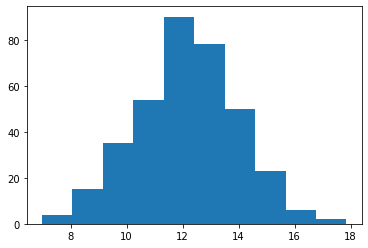

In [7]:
coloumn_name='radius_mean'
features=data[data['diagnosis']=='B'][coloumn_name]
plt.hist(features)

In [8]:
class extended_dataframe_class(pd.DataFrame):
    def determine_random_variable_type(self,column_name):
        print("TYPE= ",type(data[column_name]))
        
        if (((df[column_name].dtypes) == object or (df[column_name].dtypes) == int) and (len(data[column_name].unique()) < len(data[column_name]))):
        
            return 'discrete'
    
        else:
        
            return 'continous'
    def calculate_L_max_normal(self,column_name):
    
        mu_best_normal = data[column_name].mean()
    
        sigma_best_normal = data[column_name].std()
    
        L_max_normal = np.sum(np.log(norm.pdf(data[column_name],mu_best_normal,sigma_best_normal)))
        #write the expression for evaluating the maximized value of Log Likelihood Function for Normal Distribution
    
        return L_max_normal
    def calculate_L_max_rayleigh(self,column_name):
    
        sigma_best_rayleigh = np.sqrt(data[column_name]**2/(2*569))
        #calculate the value of best estimate of MVU Estimator of sigma of Rayleigh Distribution here
    
        L_max_rayleigh = np.sum(np.log(sigma_best_rayleigh))
        #write the expression for evaluating the maximized value of Log Likelihood Function for Rayleigh Distribution
    
        return L_max_rayleigh
    def determine_distribution_type(self,column_name):
        column_type=self.determine_random_variable_type(column_name)
        #print("           HELLO              ")
        print("\nColoumn Type=",column_type)
        #Write the code here to first determine type of random variable : Either Discrete or Continous
        if column_type == 'discrete':
            if(len(data['diagnosis'].unique())==2):
                print("Binomial")
            else:
                print("Multinomial")
            
        
            #if the above condition is true, then write the code to determine whether it's binomial or multinomial
            #and return the strings 'binomial' or 'multinomial' accordingly
        
        else:
        
            L_max_normal = self.calculate_L_max_normal(column_name) 
        
            L_max_rayleigh = self.calculate_L_max_rayleigh(column_name)
            print("\nL_max_normal=",L_max_normal)
            print("\nL_max_rayleigh=",L_max_rayleigh)
        
            if L_max_normal > L_max_rayleigh:
                features=data[data['diagnosis']=='M'][column_name]
                plt.hist(features)
                plt.xlabel(column_name+'[diagnosis=M]')
                plt.ylabel('frequency')
                return 'normal'
        
            else:
                features=data[data['diagnosis']=='M'][column_name]
                plt.hist(features)
                plt.xlabel(column_name+'[diagnosis=M]')
                plt.ylabel('frequency')
                return 'rayleigh'
    

In [9]:
obj=extended_dataframe_class()

TYPE=  <class 'pandas.core.series.Series'>

Coloumn Type= continous

L_max_normal= -1636.965015429928

L_max_rayleigh= -331.86647700276916


'rayleigh'

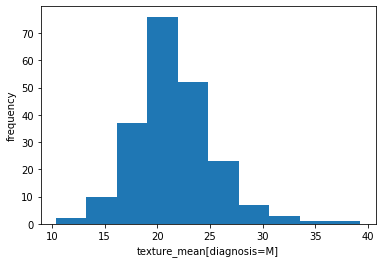

In [11]:
obj.determine_distribution_type(df.columns[3])

In [ ]:
for i in range(1,3):
    print("\n")
    obj.determine_distribution_type(df.columns[i])